In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import scipy.stats
from IPython.display import Video, display, HTML
sns.set()

def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path) +'.gz', *args, **kwargs)
    except Exception as e:
        return pd.read_csv(str(path), *args, **kwargs)

def followorbit(vals, path):
    out = []
    for n in range(100):
        closest05 = np.clip(round(path[n] * 2) / 2, 0, 10)
        rank = vals.query(f'nbopp == {n} and othercoop == {closest05}')['rank'].values[0]
        out.append(rank)
    return np.array(out)

import re
def gethighest(vals, prefix="analysis_log_"):
        m = np.argmax([int(re.search(f'{prefix}(\d+)', val).group(1)) for val in vals])
        return vals[m]

def readparams(file):
    params = {} 
    with open(file) as f:
        for line in f:
            line = line[:-1]  # remove \n
            if not line or line.startswith('#') or line.startswith('import'):
                continue
            key, val = line.split('=')
            if val.lower() == 'true' or val.lower() == 'false':
                params[key] = val.lower() == 'true'
            else:
                try:
                    params[key] = float(val)
                except ValueError:
                    params[key] = val
    return params

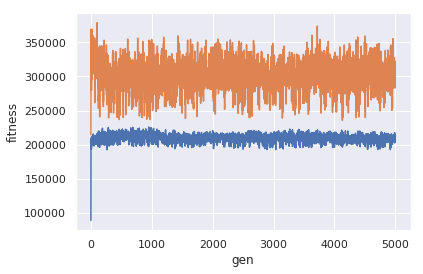

Cannot load vid
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-1000-2019-06-11-1643/lion_big/o120/mt_true/run_01/rep00/analysis_log_4999.txt.gz
break at i


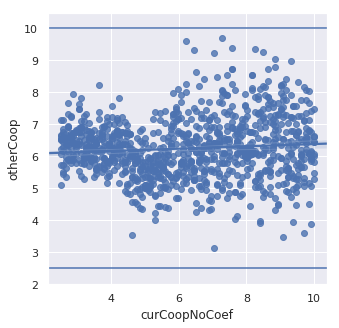

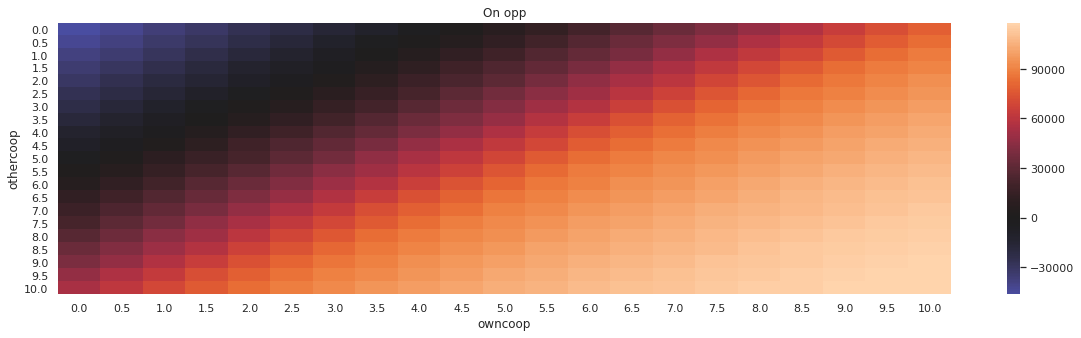

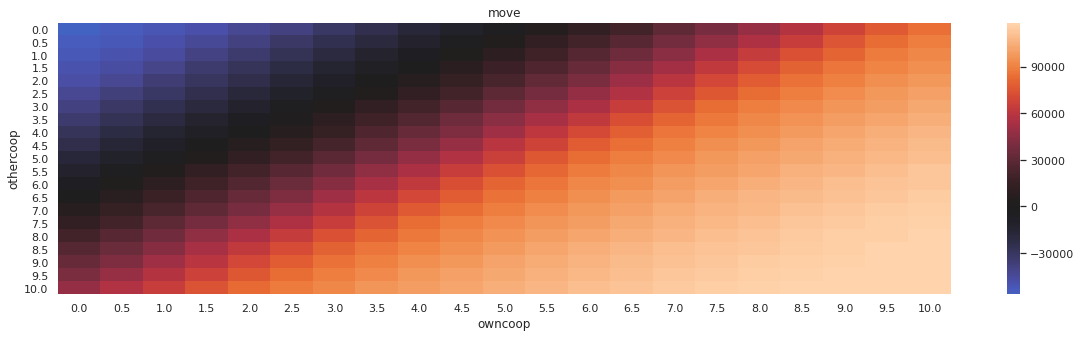

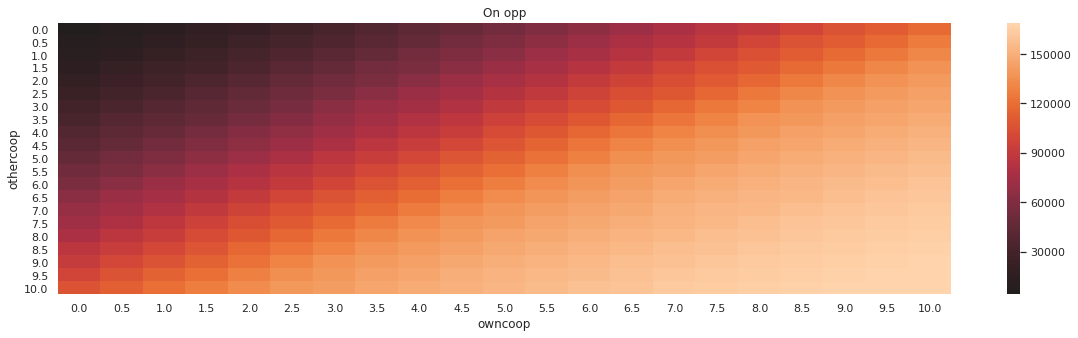

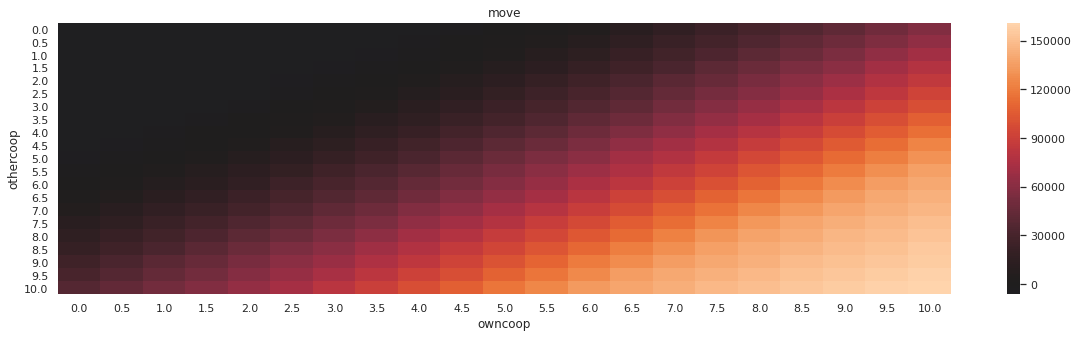

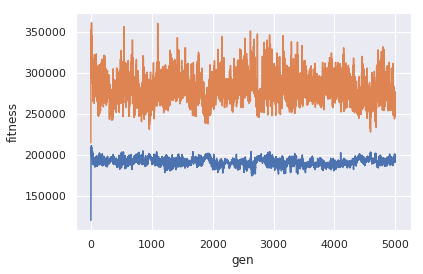

Cannot load vid
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-1000-2019-06-11-1643/lion_big/o120/mt_true/run_02/rep00/analysis_log_4999.txt.gz
break at i


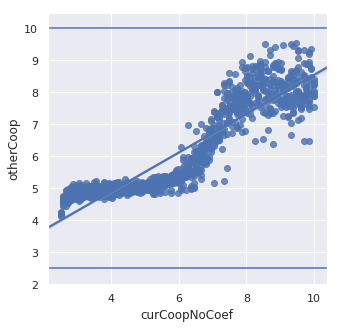

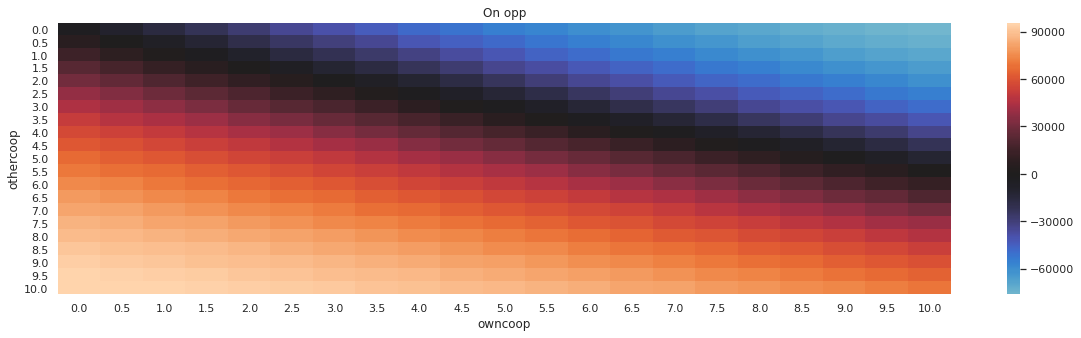

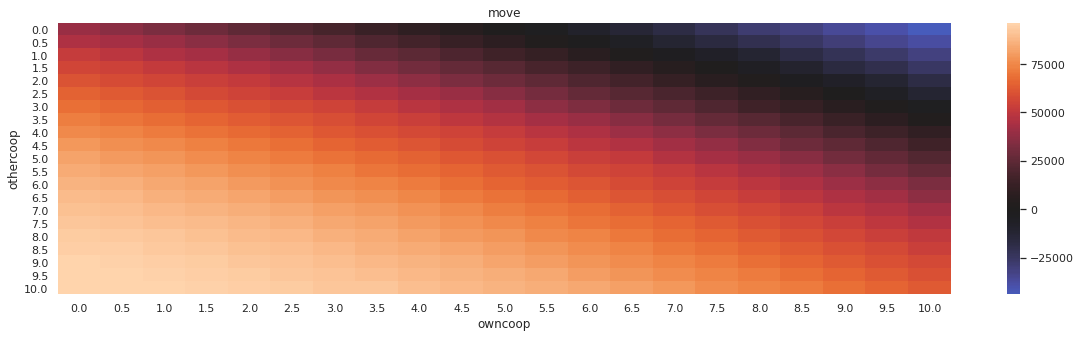

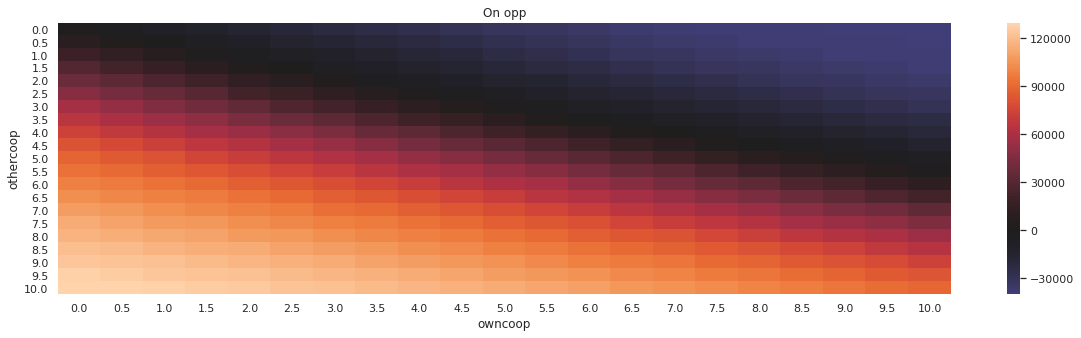

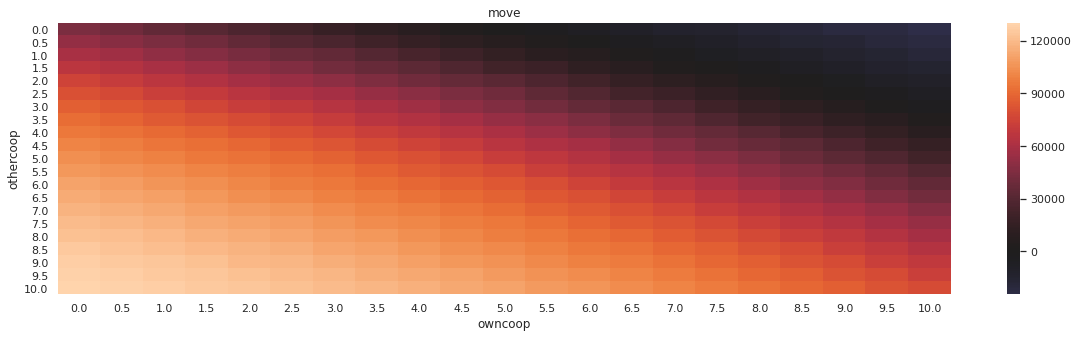

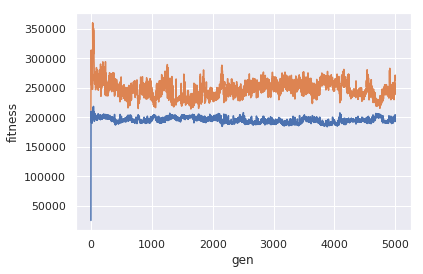

Cannot load vid
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-200-2019-06-11-1643/lion_big/o120/mt_true/run_01/rep00/analysis_log_4999.txt.gz
break at i


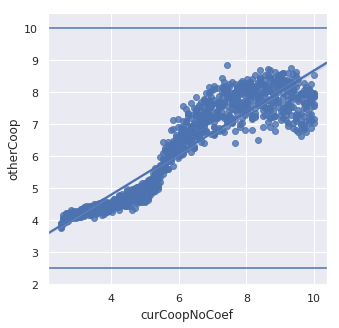

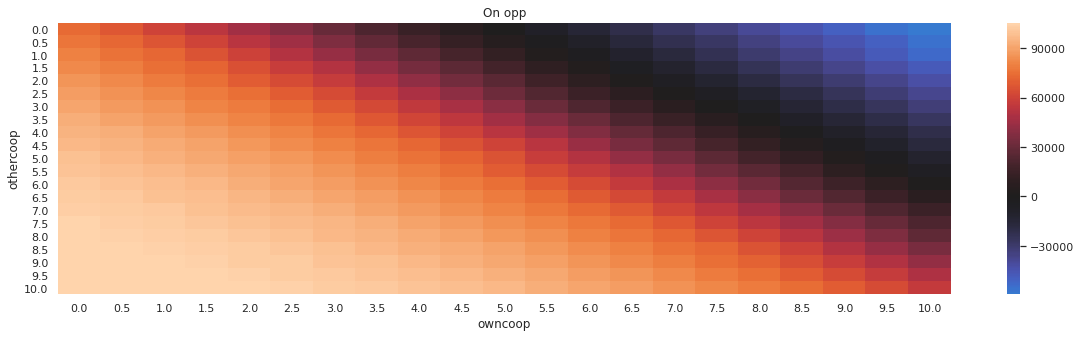

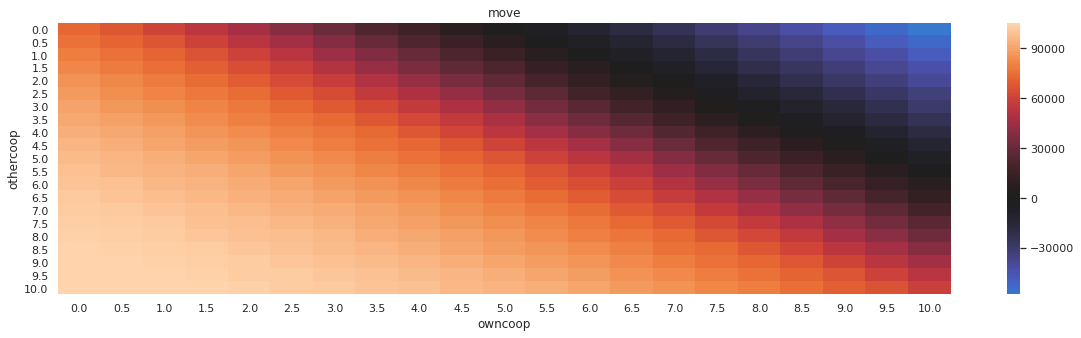

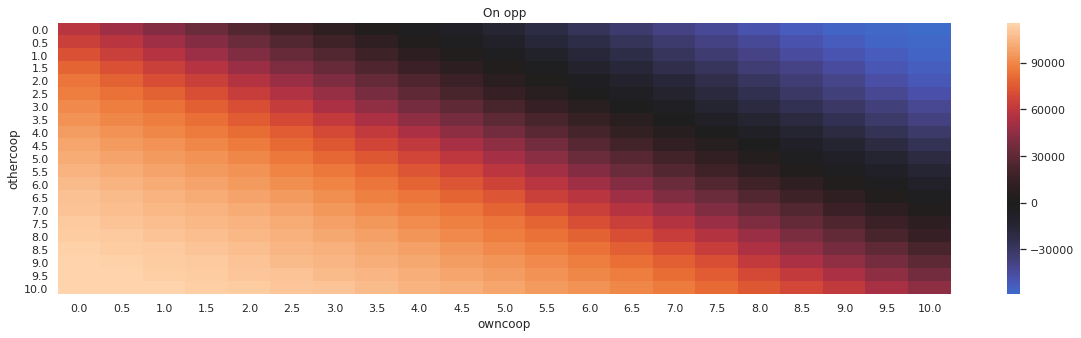

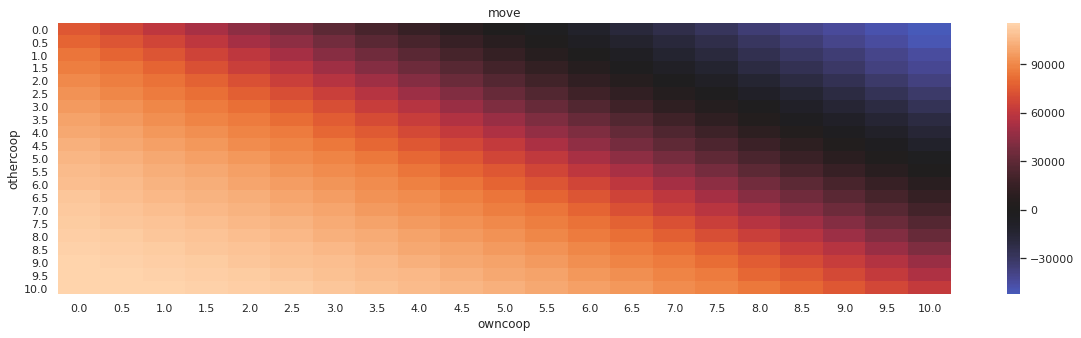

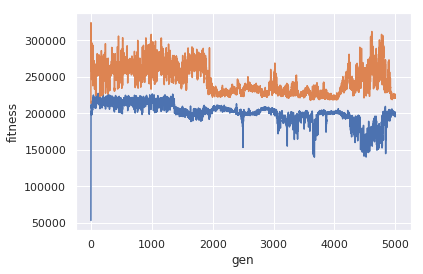

Cannot load vid
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-200-2019-06-11-1643/lion_big/o120/mt_true/run_02/rep00/analysis_log_4999.txt.gz
break at i


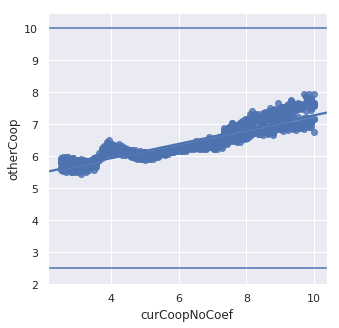

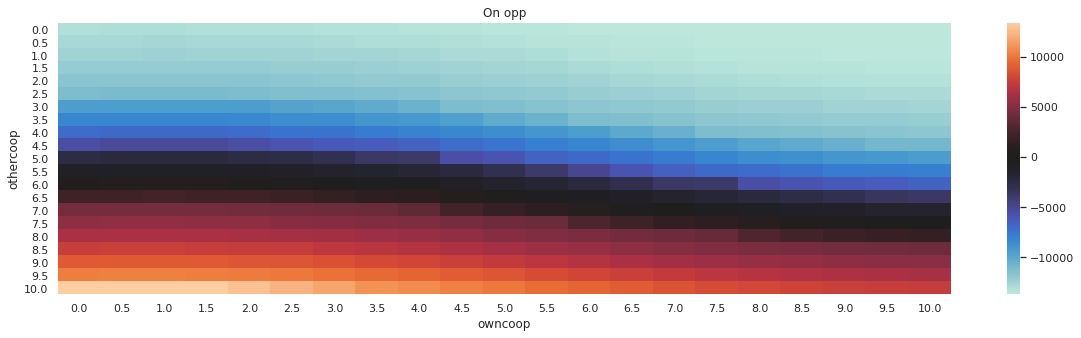

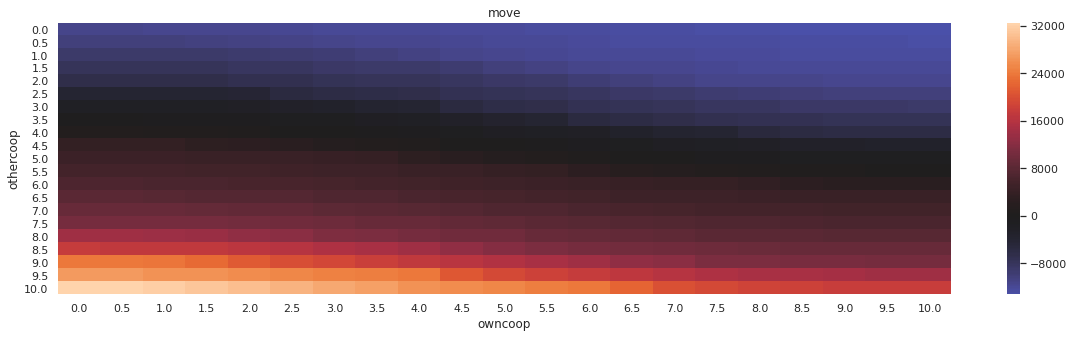

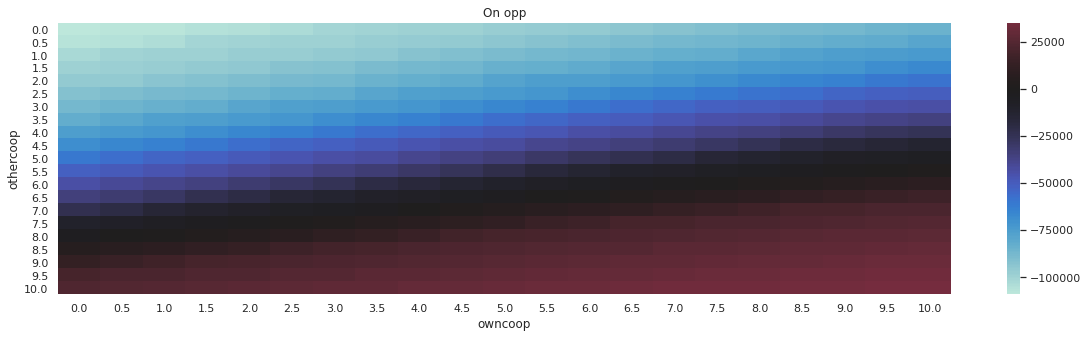

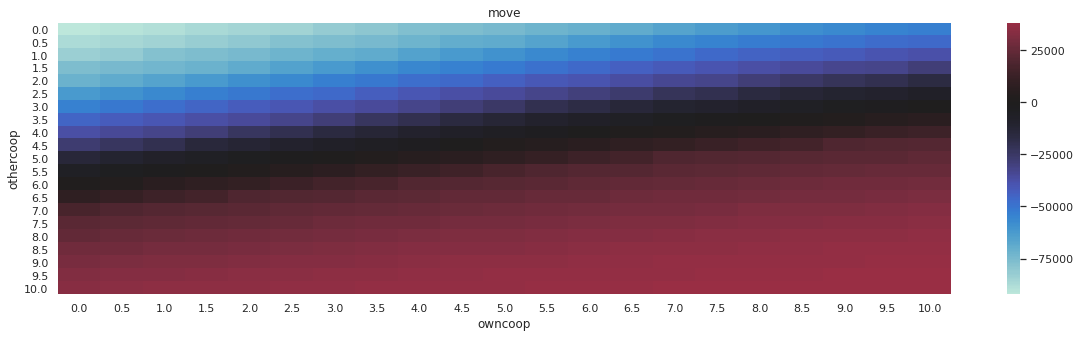

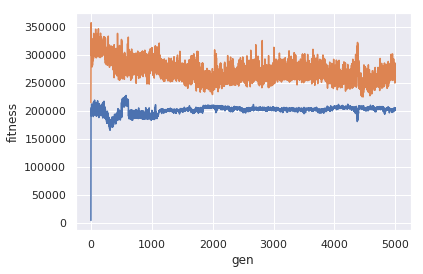

Cannot load vid
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-500-2019-06-11-1643/lion_big/o120/mt_true/run_01/rep00/analysis_log_4999.txt.gz
break at i


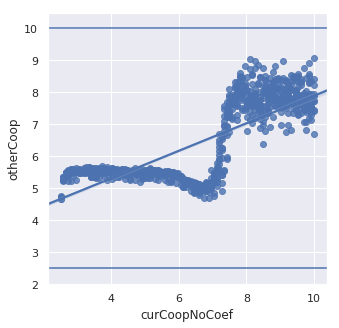

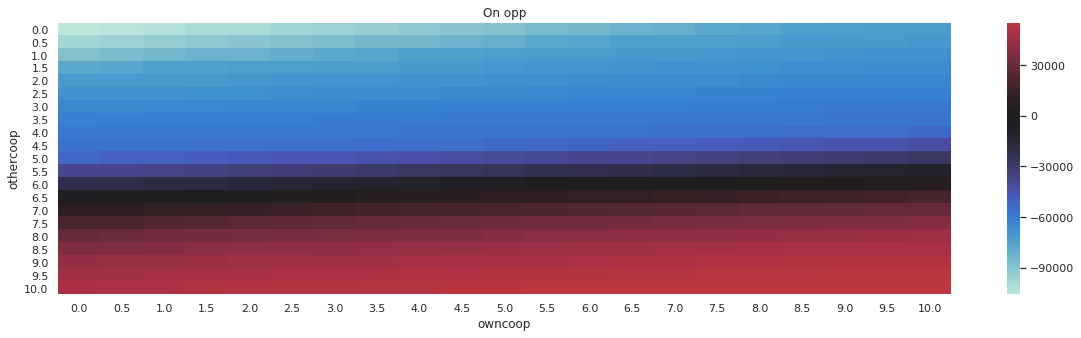

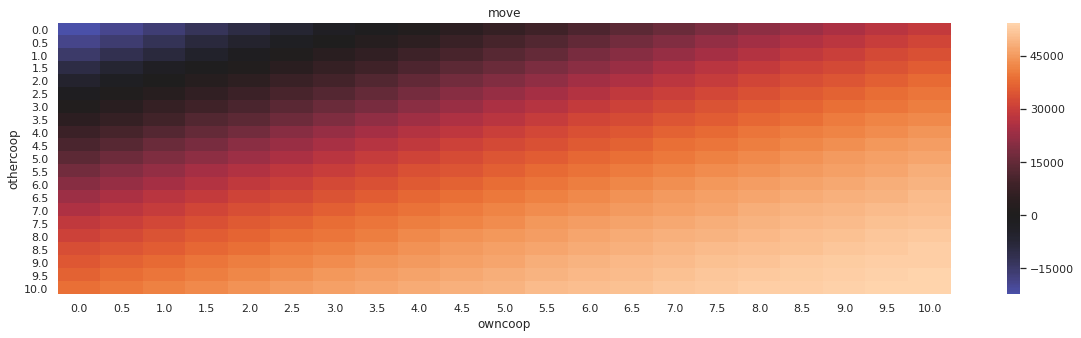

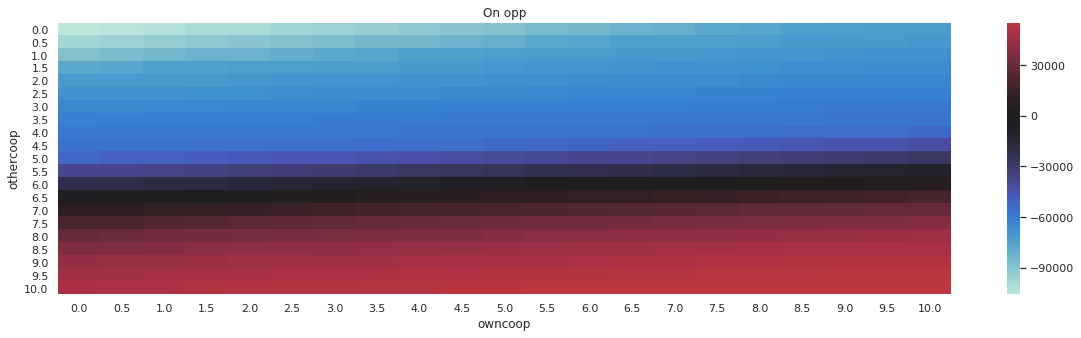

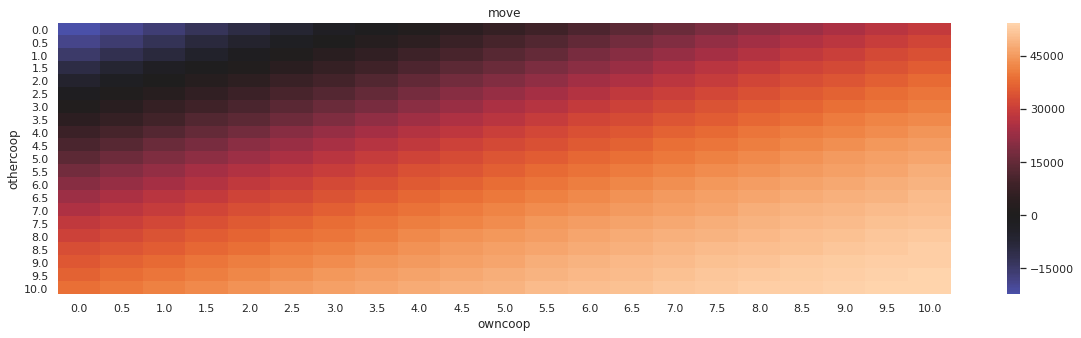

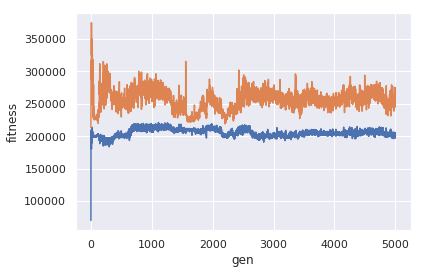

Cannot load vid
../../../../logs/lions-maxtwo-pop100-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-500-2019-06-11-1643/lion_big/o120/mt_true/run_02/rep00/analysis_log_4999.txt.gz
break at i


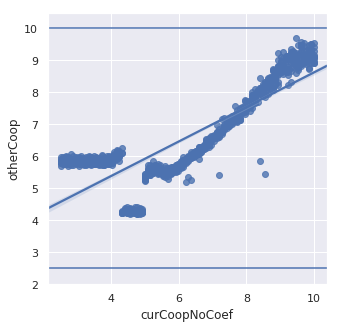

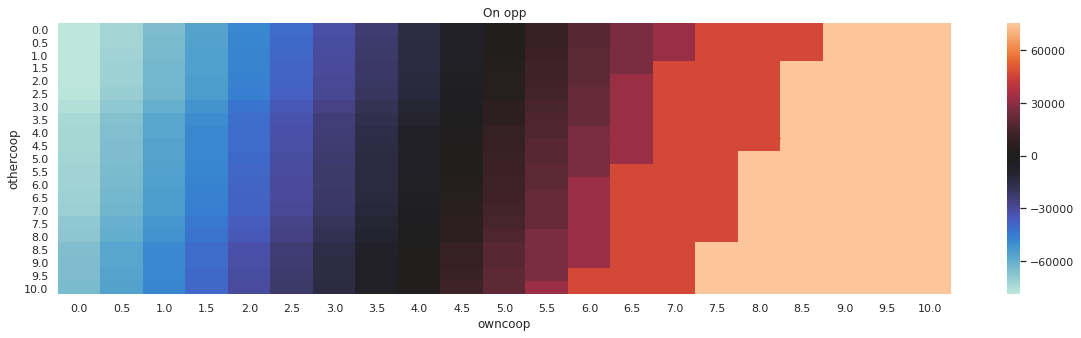

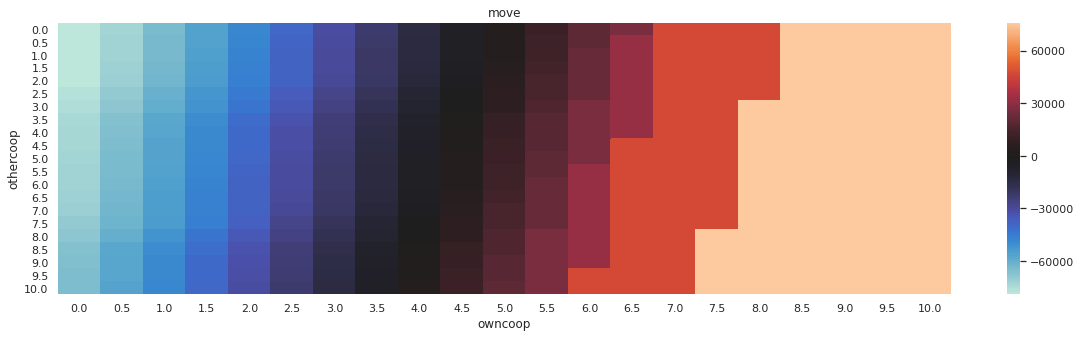

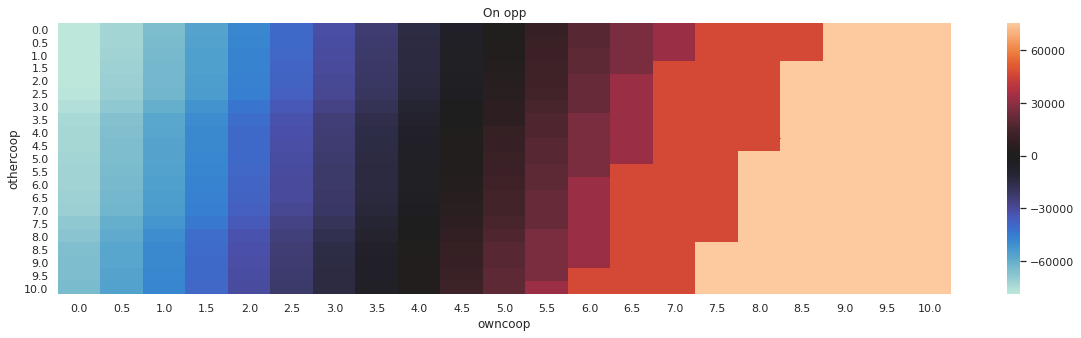

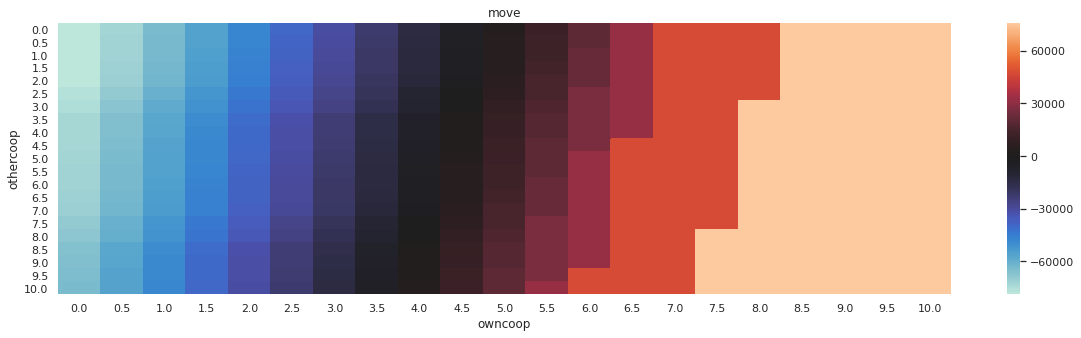

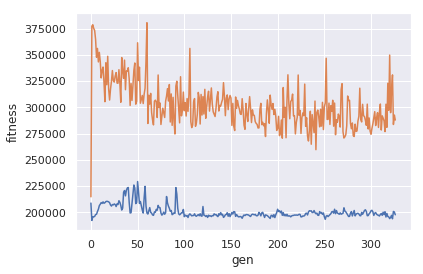

Cannot load vid
../../../../logs/lions-maxtwo-pop1000-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-1000-2019-06-11-1821/lion_big/o520/mt_true/run_01/rep00/analysis_log_249.txt
break at i


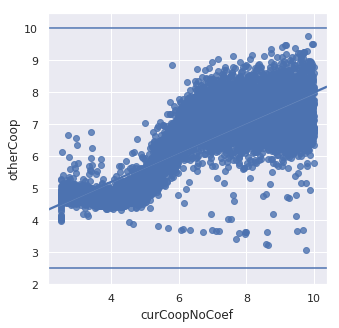

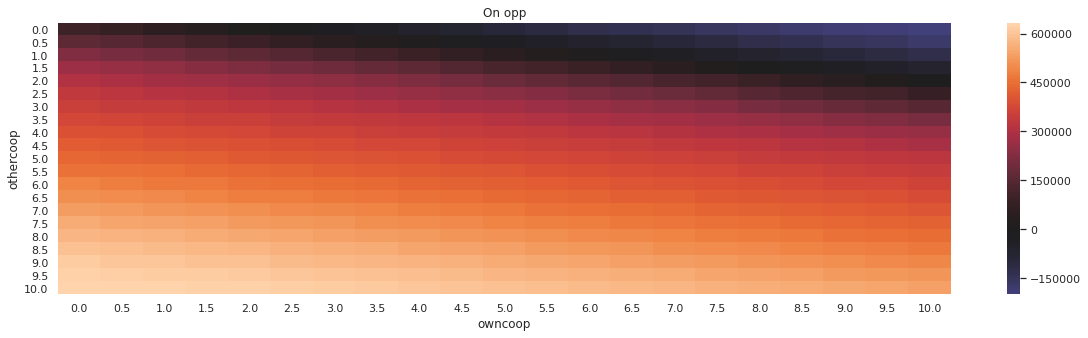

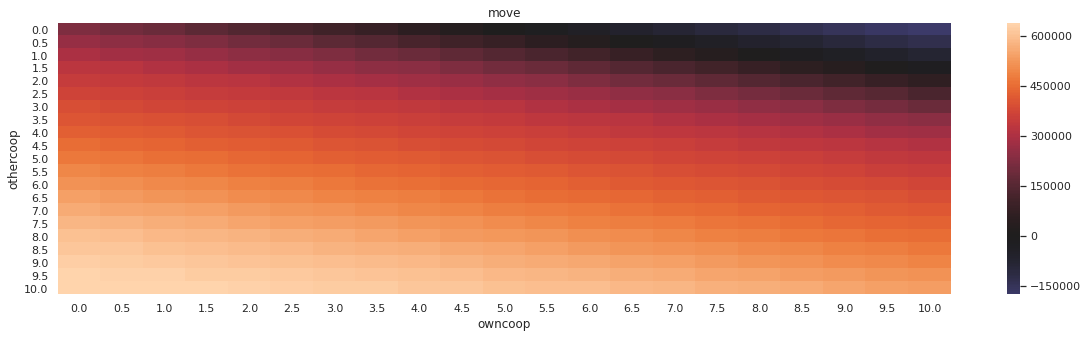

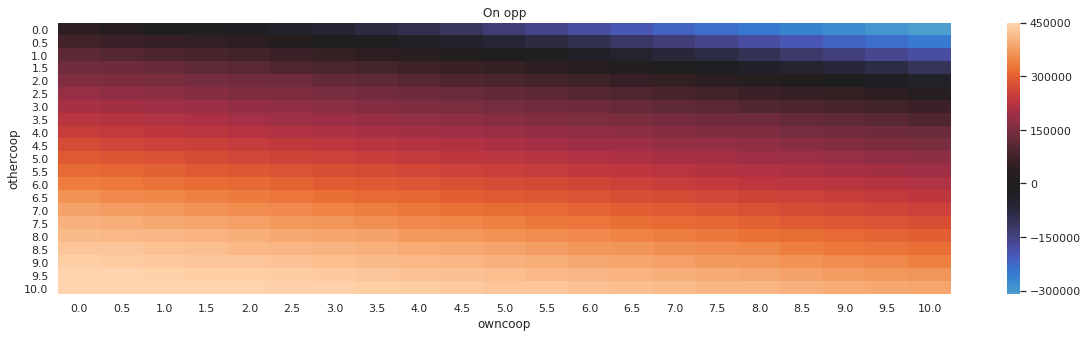

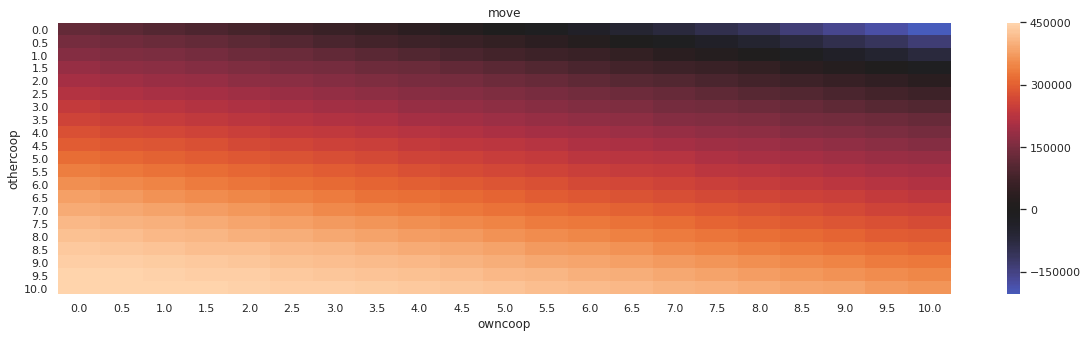

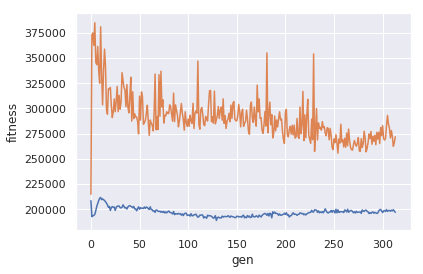

Cannot load vid
../../../../logs/lions-maxtwo-pop1000-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-1000-2019-06-11-1821/lion_big/o520/mt_true/run_02/rep00/analysis_log_249.txt
break at i


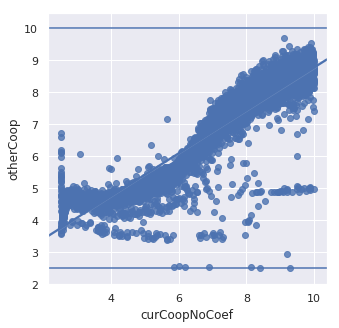

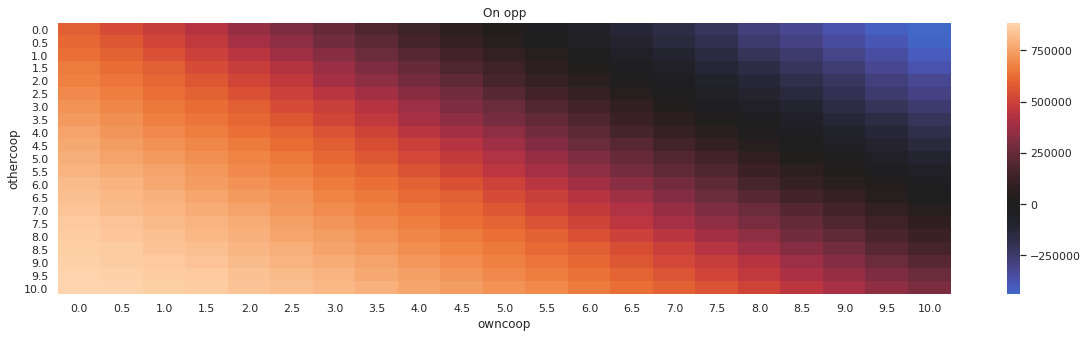

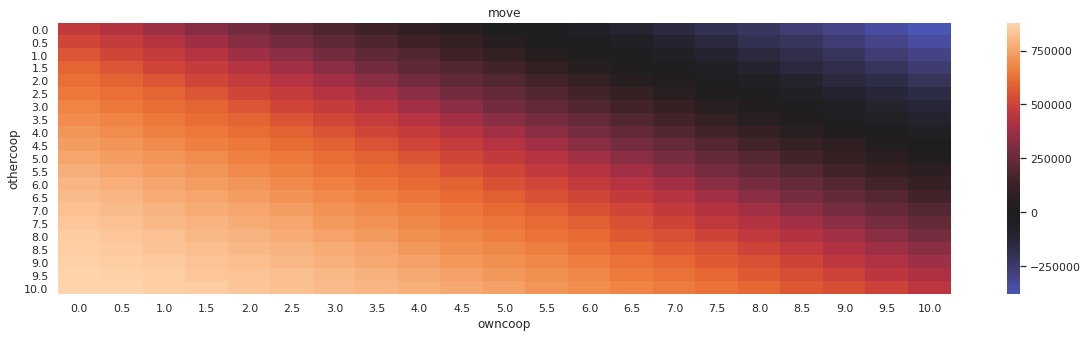

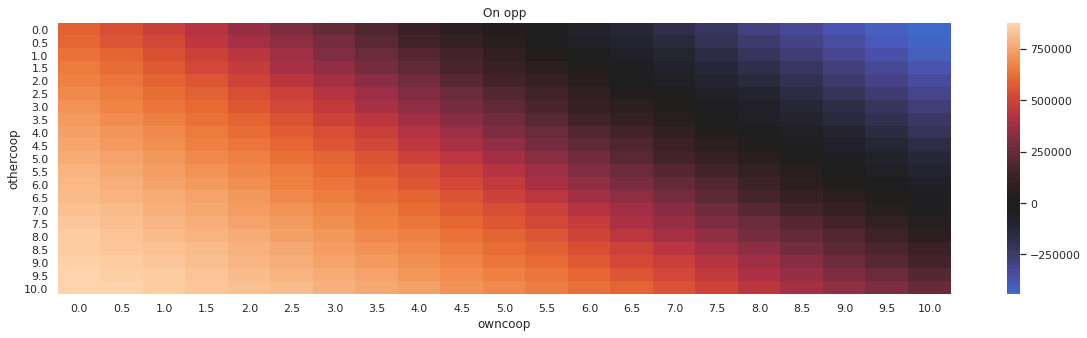

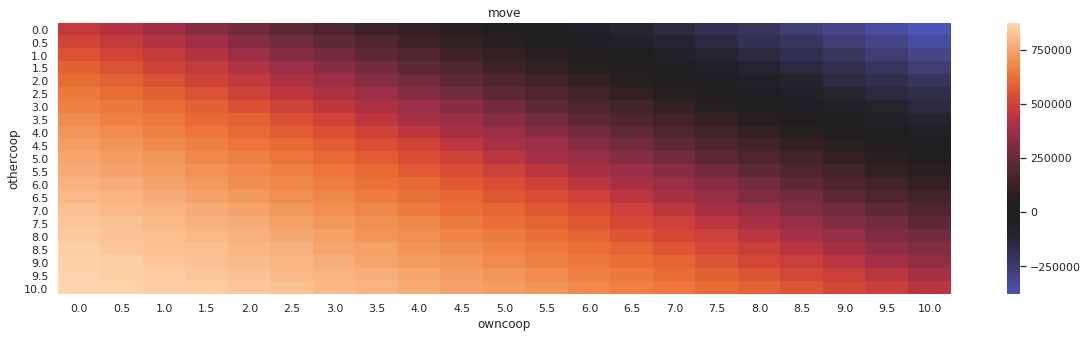

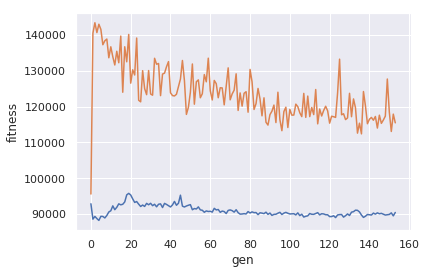

Cannot load vid
cannot load analysis log


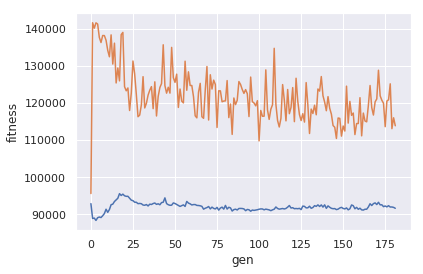

Cannot load vid
cannot load analysis log


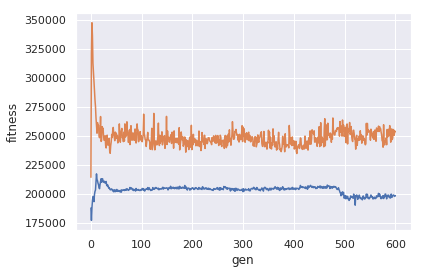

Cannot load vid
../../../../logs/lions-maxtwo-pop500-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-100-2019-06-11-1644/lion_big/o320/mt_true/run_01/rep00/analysis_log_499.txt
break at i


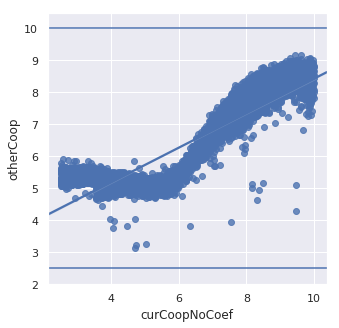

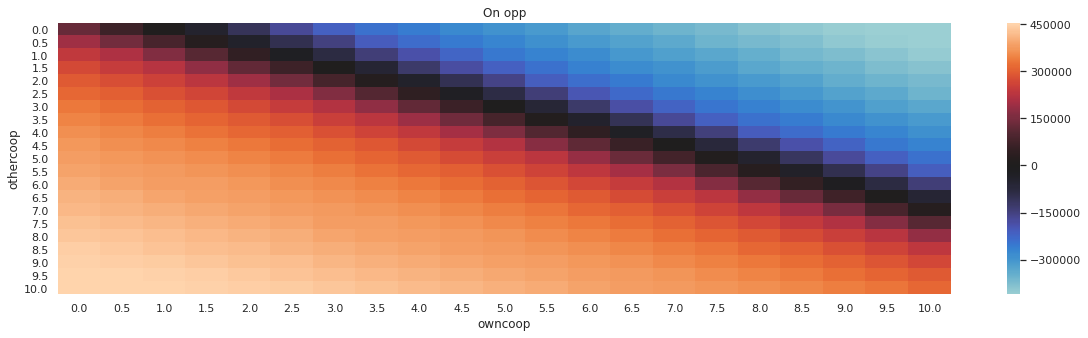

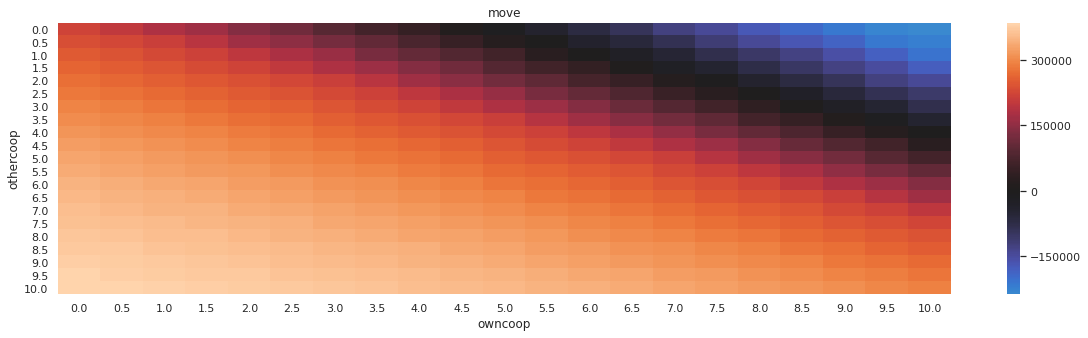

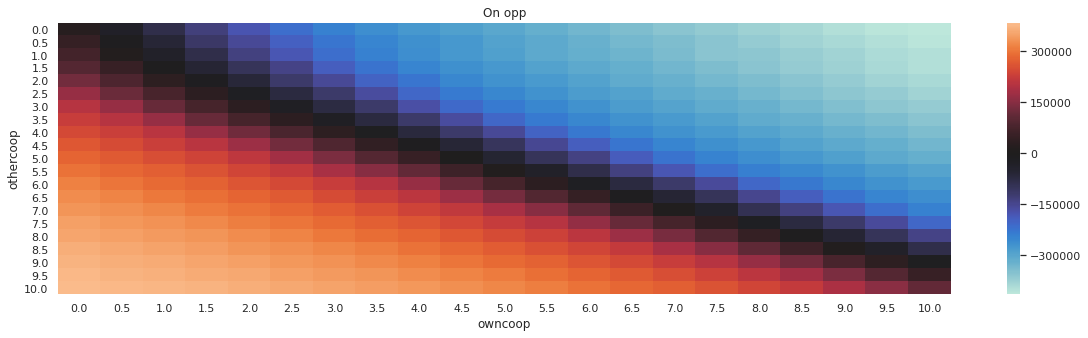

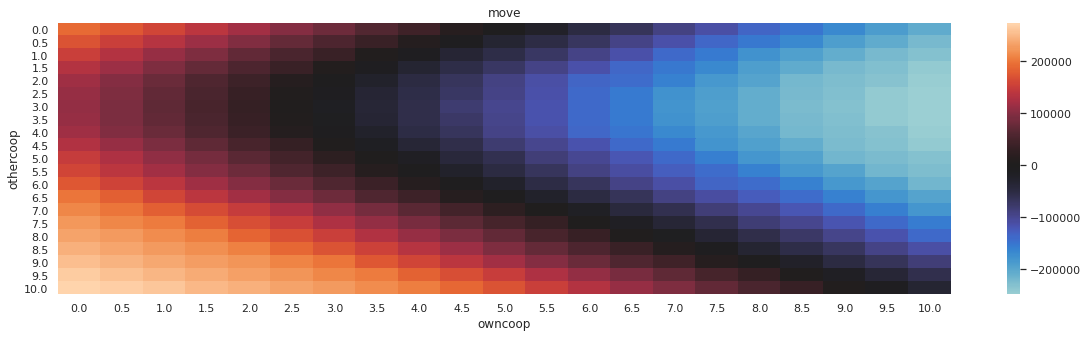

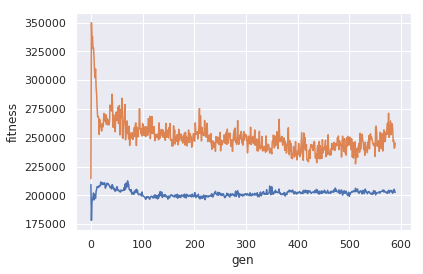

Cannot load vid
../../../../logs/lions-maxtwo-pop500-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-100-2019-06-11-1644/lion_big/o320/mt_true/run_02/rep00/analysis_log_499.txt
break at i


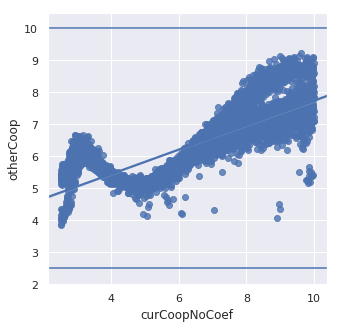

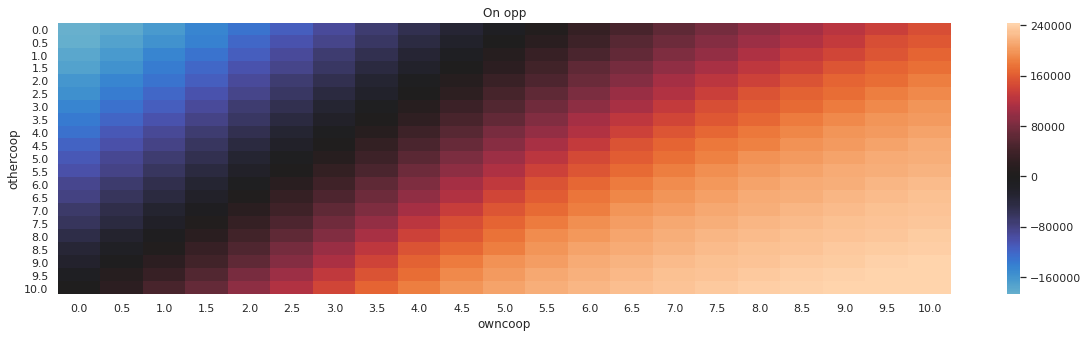

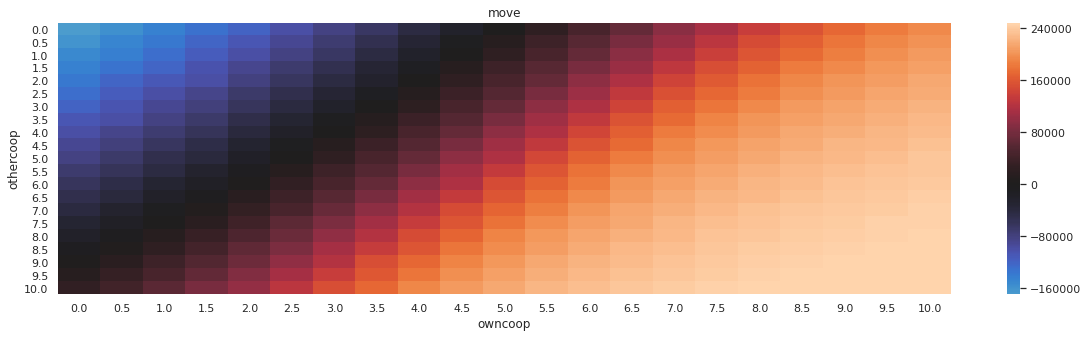

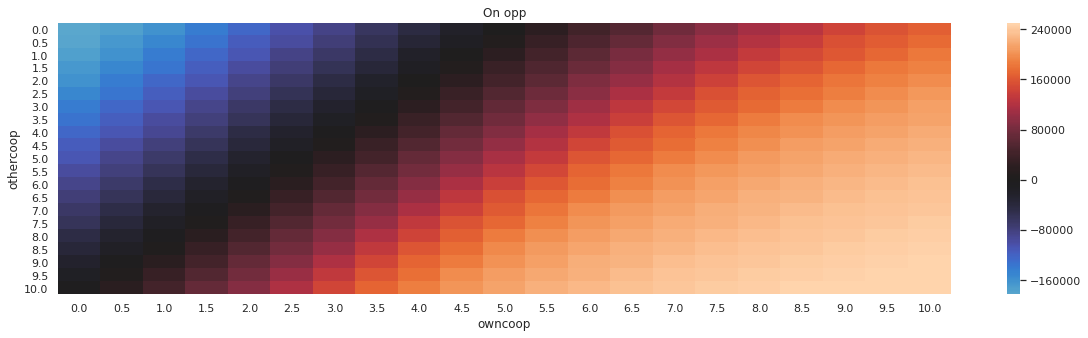

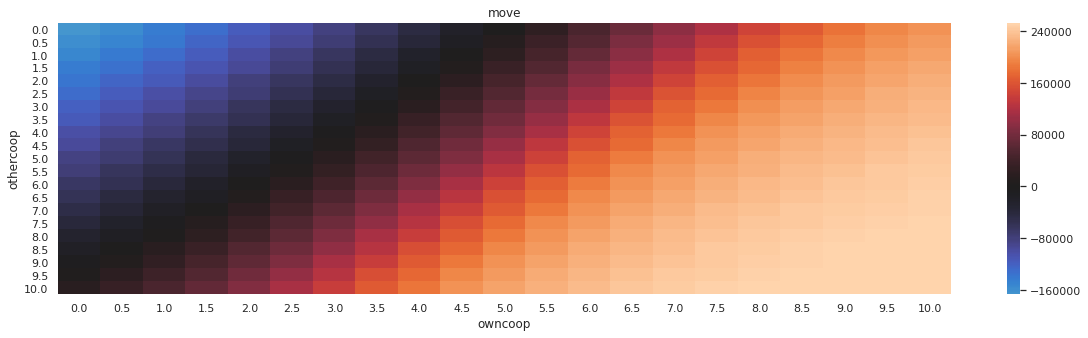

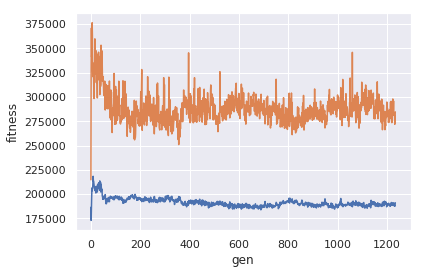

Cannot load vid
../../../../logs/lions-maxtwo-pop500-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-1000-2019-06-11-1642/lion_big/o320/mt_true/run_01/rep00/analysis_log_999.txt
break at i


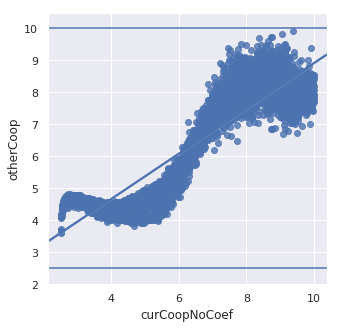

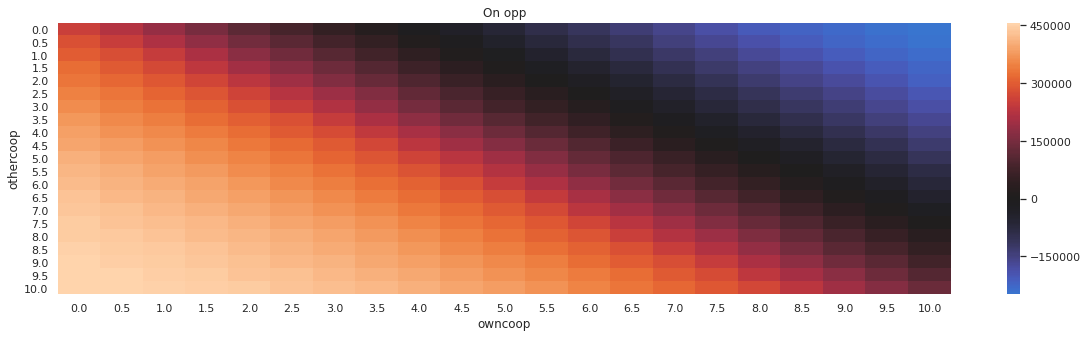

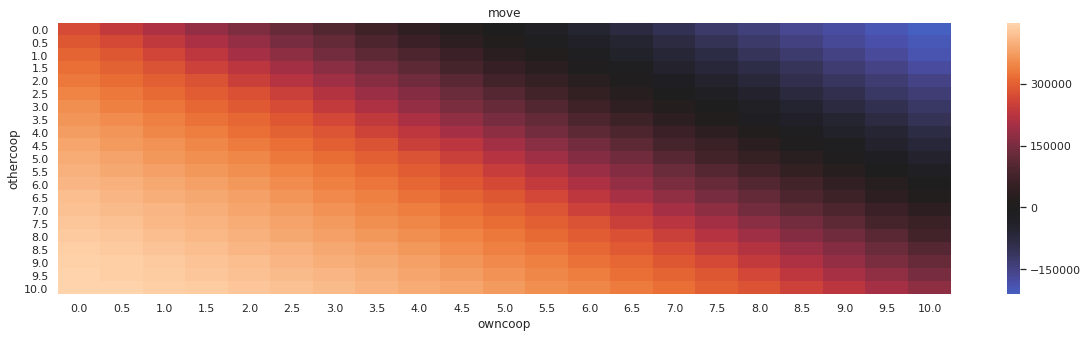

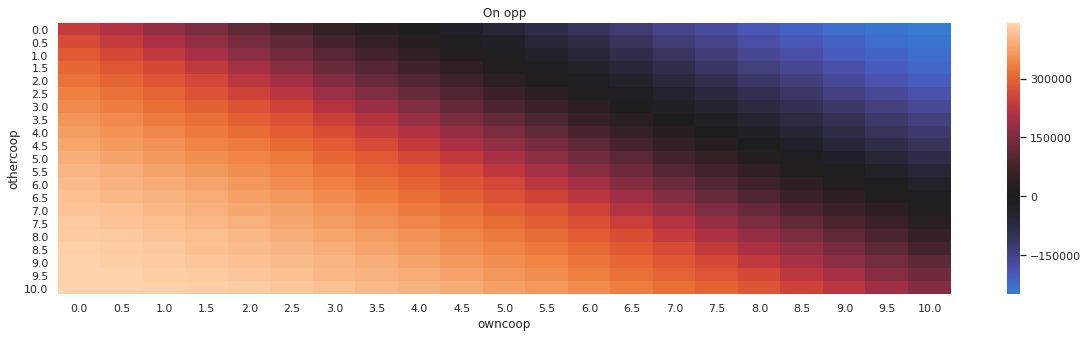

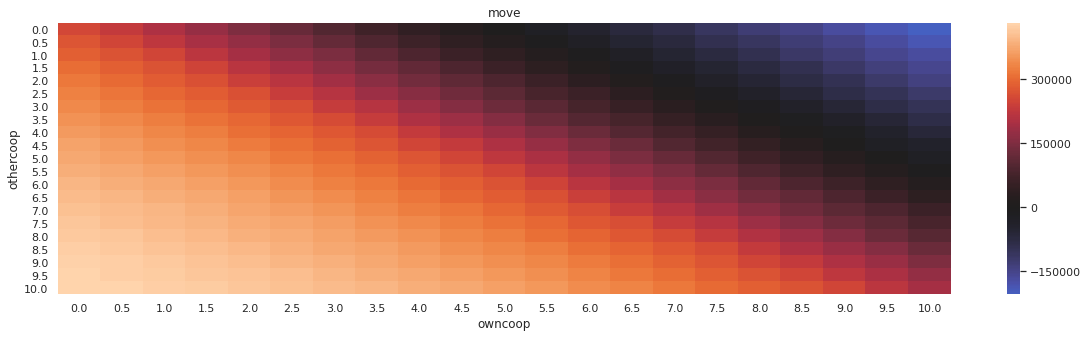

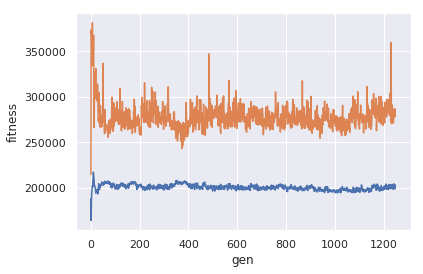

Cannot load vid
../../../../logs/lions-maxtwo-pop500-lowmut-lotofreps-independantlin-fake_true-b10-nocost-decay-1000-2019-06-11-1642/lion_big/o320/mt_true/run_02/rep00/analysis_log_999.txt
break at i


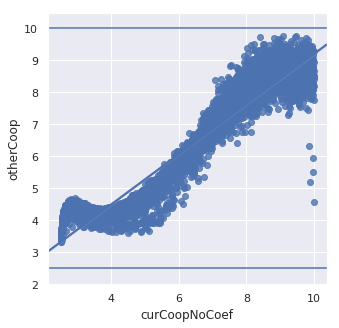

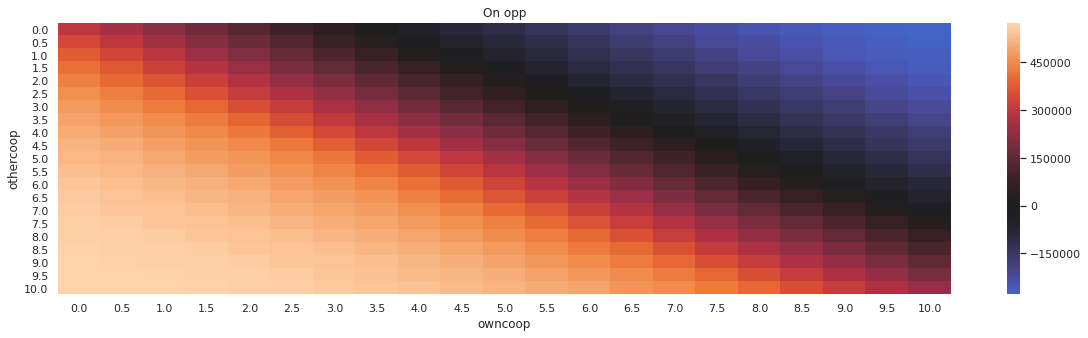

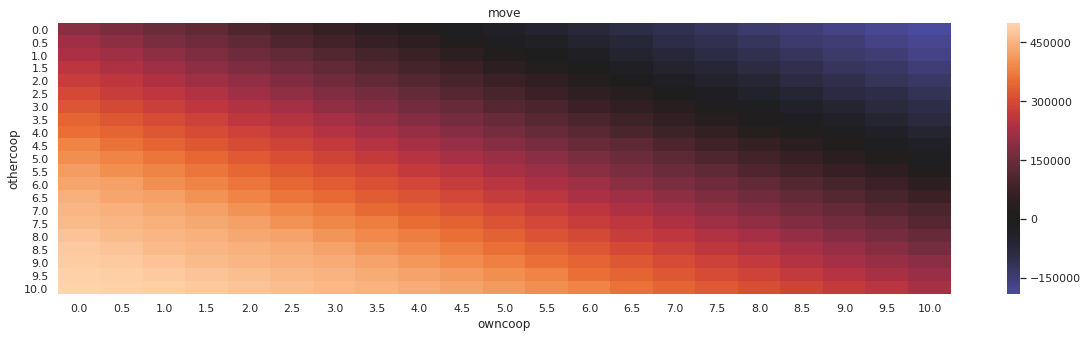

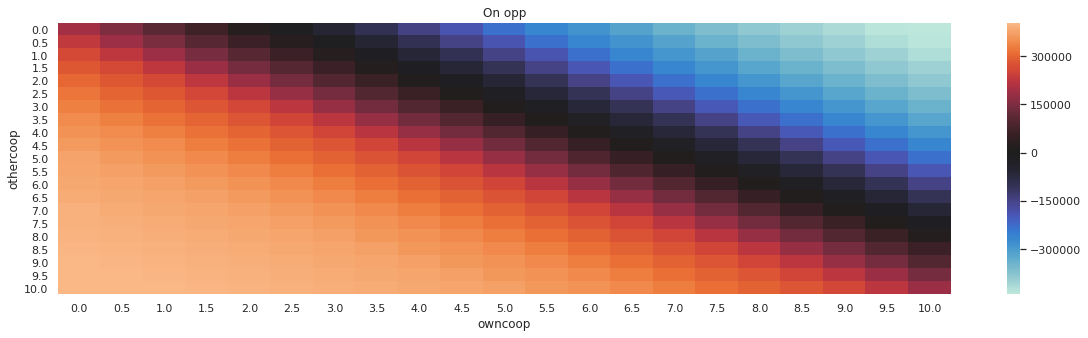

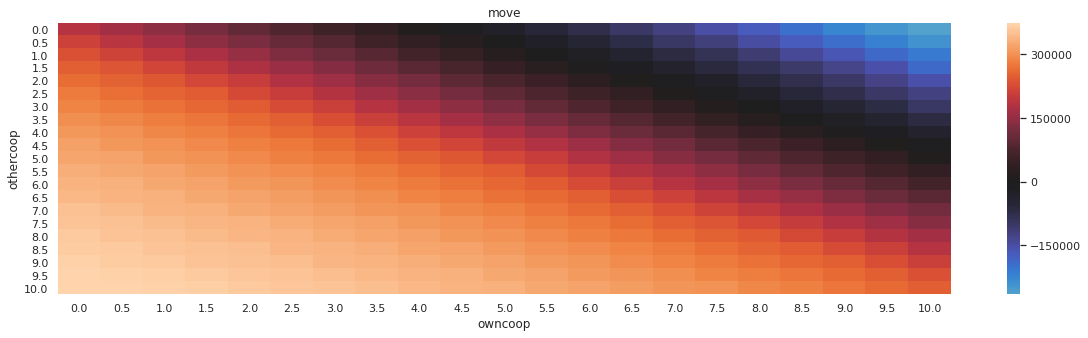

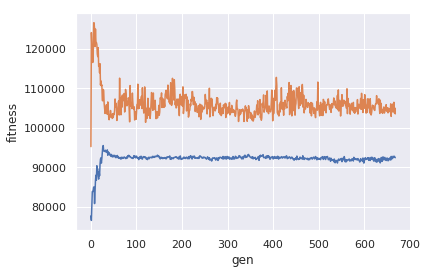

Cannot load vid
../../../../logs/lions-maxtwo-pop500-lowmut-lotofreps-independantlin-fake_true-b3-nocost-decay-100-2019-06-11-1644/lion_big/o320/mt_true/run_01/rep00/analysis_log_499.txt
break at i


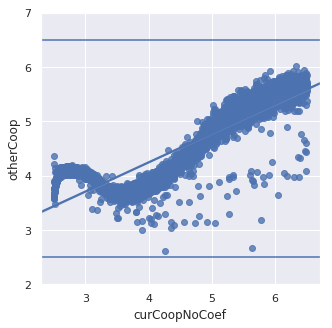

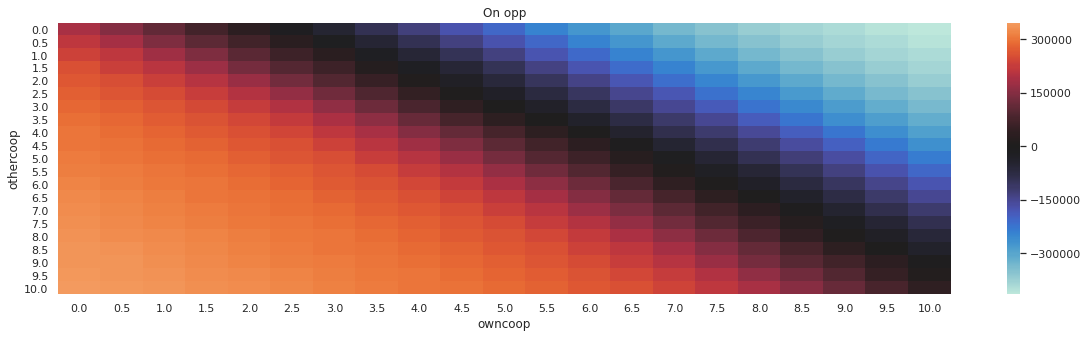

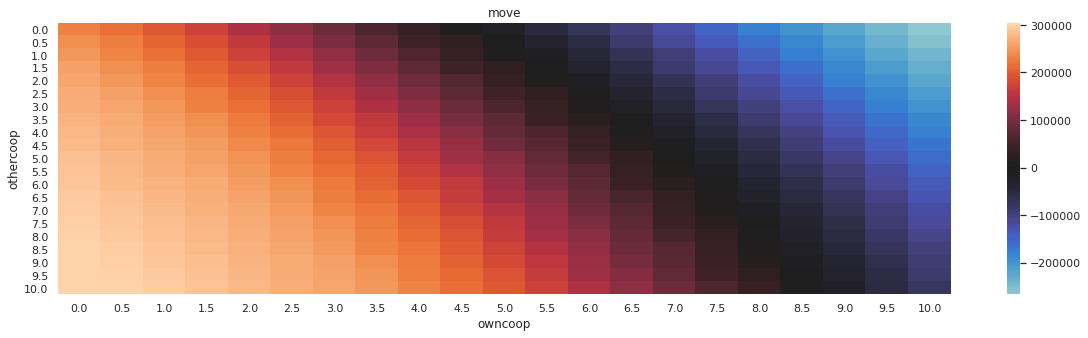

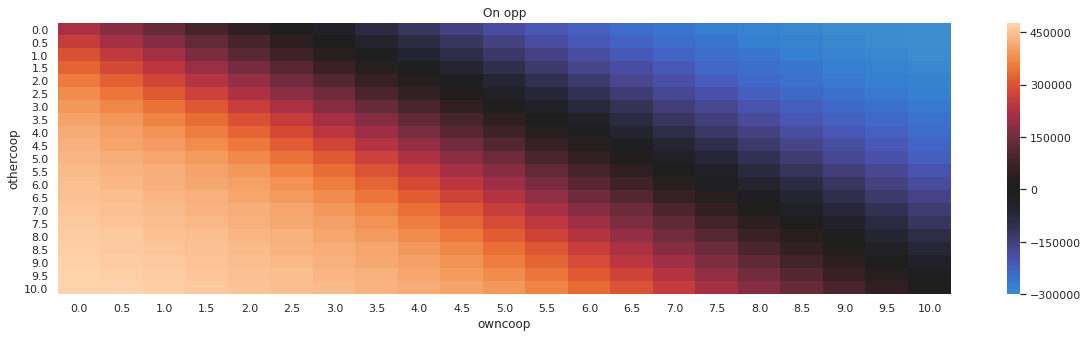

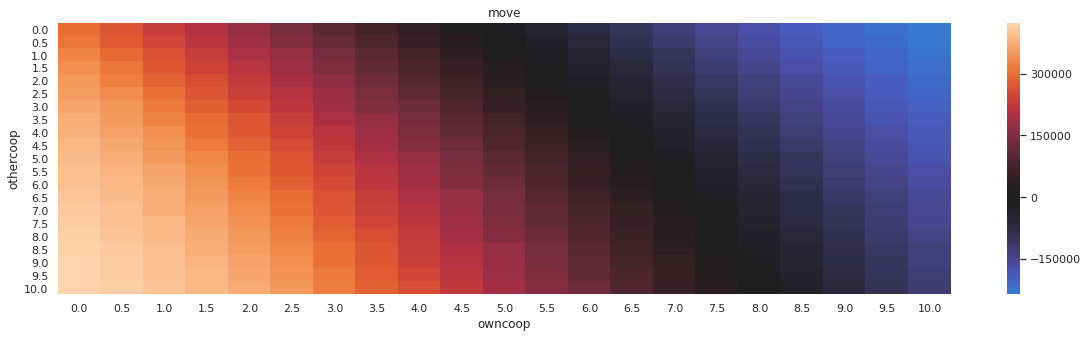

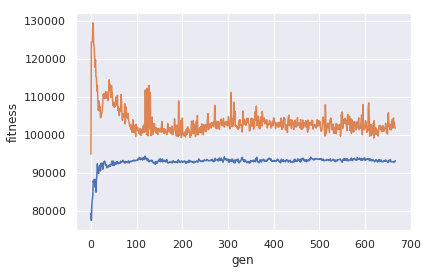

Cannot load vid
../../../../logs/lions-maxtwo-pop500-lowmut-lotofreps-independantlin-fake_true-b3-nocost-decay-100-2019-06-11-1644/lion_big/o320/mt_true/run_02/rep00/analysis_log_499.txt
break at i


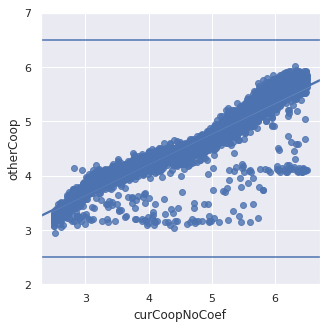

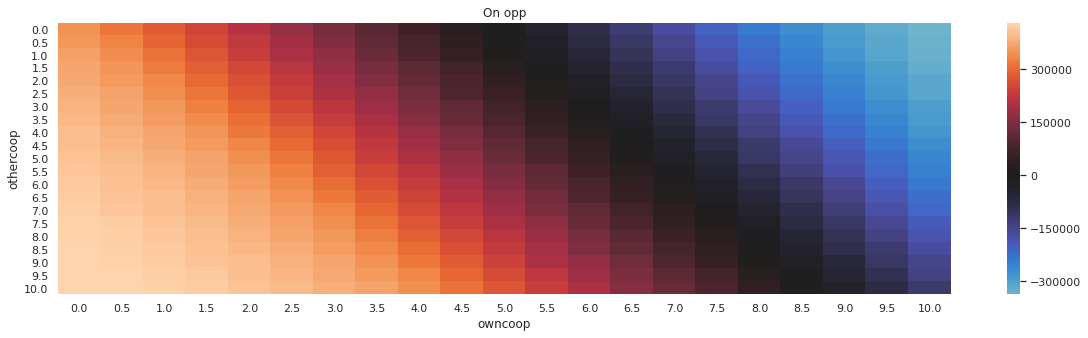

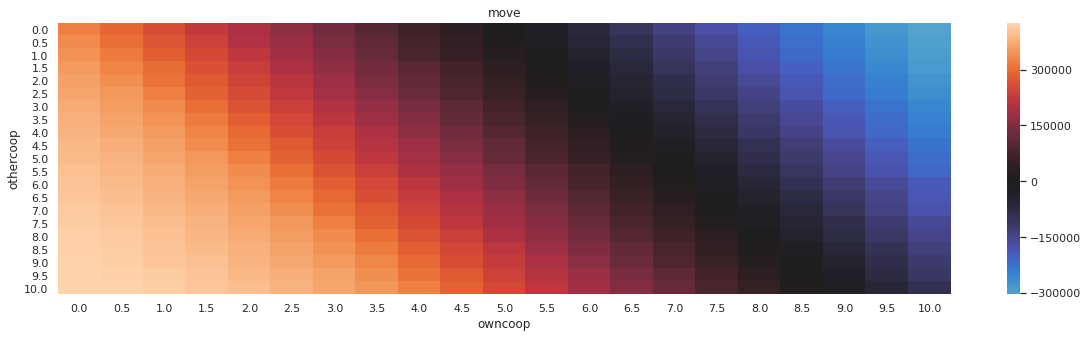

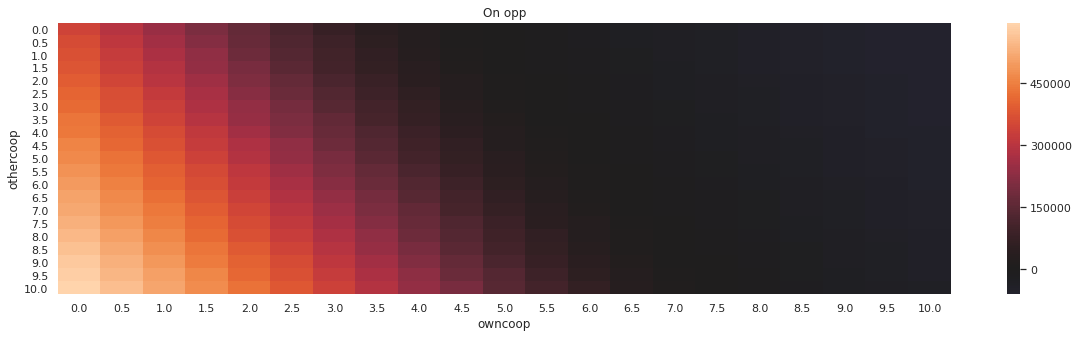

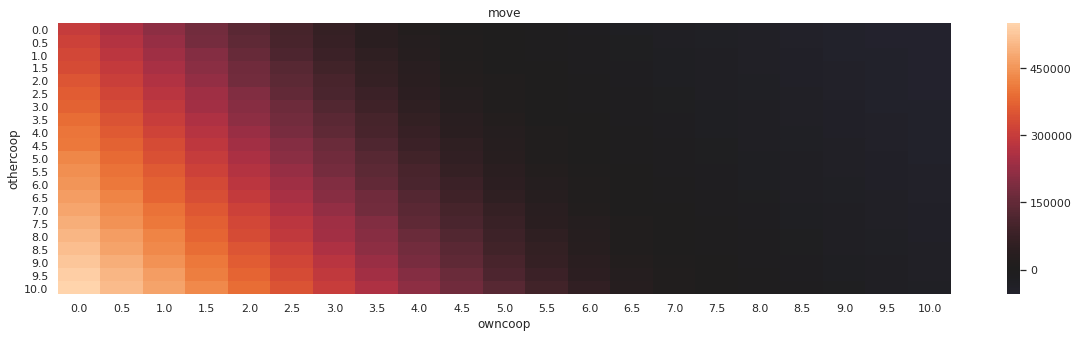

In [4]:
dofolloworbit = True
paths = "../../../../logs/lions-maxtwo*-2019-06-11-*/**/rep00/"
#path = "/data/log/tournamentnofrichardpayofflongev/rep00/"
for path in sorted(glob.glob(paths, recursive=True)):
    display(HTML(f'<h3>{path}</h3>'))
    try:
        fit = read_csvx(path + "fitnesslog.txt", delimiter="\t")
        fit = fit.groupby(['gen', 'ind'], as_index=False).sum()
        plt.figure()
        sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='median')
        sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='max')
        #sns.lineplot(y='fitness', x='gen', data=fit, ci=None, estimator='min')
        plt.show()
    except Exception:
        print('Cannot load fitness')
    # Video
    try:
        vid = Video(gethighest(glob.glob(path+'/mov_*.mp4')))
        display(vid)
    except Exception:
        print('Cannot load vid')
    try:
        high = gethighest(glob.glob(path+'/analysis_log_*'));
    except Exception:
        print('cannot load analysis log')
        continue
    print(high)
    df = read_csvx(high, delimiter="\t")
    df['rank'] = scipy.stats.rankdata(df['score'])
    for ind in df['ind'].unique():
        neutral = df.query(f'ind == {ind} and owncoop == 5 and cost == 1 and nbopp == 0 and othercoop == 0').median()['rank']
        df.loc[df['ind'] == ind, 'normrank'] = df.loc[df['ind'] == ind, 'rank'] - neutral 
    #plt.figure(figsize=(20, 5))
    #sns.lineplot(x='nbopp', y='owncoop', units='ind', data=df.query('othercoop == 0 and cost == 1'), estimator=None, legend='full', alpha=0.01)
    #sns.lineplot(x='nbopp', y='owncoop', data=df.query('othercoop == 0 and cost == 1'), estimator=np.median, legend='full', color="blue")

    #plt.show()
    try:
        logall = read_csvx(gethighest(glob.glob(path + 'logall*'), 'logall_'), delimiter="\t")
    except Exception as e:
        print(e)
        continue
    meancoop = logall.query('nbOnOpp == 2').groupby(['id'], as_index=False).mean()
    meancoop['rep'] = 0
    totmeancoop = [meancoop]

    params = readparams(glob.glob(path + 'properties*')[0])
    logall['ess'] = params['meanA'] / logall['nbOnOpp']
    ess2 = params['meanA'] / 2
    so2 = params['meanA'] + params['b'] - (params['b'] /2)
    logall['so'] = params['meanA'] + params['b'] - (params['b'] /logall['nbOnOpp'])
    logall['oppId'] = logall['oppId'].astype('category')

    i = 1
    stop = 1
    while i < stop:
        try:
            nlogall = read_csvx(gethighest(glob.glob(path + f'../rep{i:02}/logall*'), 'logall_'), delimiter="\t")
        except Exception as e:
            print(f'break at {i}')
            break
        meancoop = nlogall.query('nbOnOpp == 2').groupby(['id'], as_index=False).mean()
        meancoop['rep'] = i
        totmeancoop.append(meancoop)
        i += 1
    dftotmeancoop = pd.concat(totmeancoop)
    del totmeancoop
    # Coop corr
    plt.figure(figsize=(5, 5))
    
    #logall[['previt', 'prevother', 'prevoppid']] = logall.shift(periods=logall['id'].max()+1)[['iter', 'otherCoop', 'oppId']]
    #sns.regplot('curCoopNoCoef', 'otherCoop', logall.query('nbOnOpp == 2 and prevother == otherCoop and oppId == prevoppid').groupby(['id']).mean())
    sns.regplot('curCoopNoCoef', 'otherCoop', dftotmeancoop)

    plt.ylim(ess2 - 0.5, so2 + 0.5)
    plt.axhline(ess2)
    plt.axhline(so2)
    plt.show()
    
    if dofolloworbit:
        for i in [9, 14]:
            plt.figure(figsize=(20, 5))
            sns.heatmap(df.query(f'ind == {i} and cost == 0 and nbopp == 1').pivot_table('normrank', 'othercoop', 'owncoop'), center=0)
            plt.title('On opp')
            plt.show()
            plt.figure(figsize=(20, 5))
            sns.heatmap(df.query(f'ind == {i} and cost == 1 and nbopp == 1').pivot_table('normrank', 'othercoop', 'owncoop'), center=0)
            plt.title('move')
            plt.show()

In [ ]:
for ind in df['ind'].unique():
    neutral = df.query(f'ind == {ind} and owncoop == 5 and cost == 1 and nbopp == 0 and othercoop == 0').median()['rank']
    df.loc[df['ind'] == ind, 'normrank'] = df.loc[df['ind'] == ind, 'rank'] - neutral 
#df = df.merge(means_stds,on='indx')
#df['a0_normalized'] = (df['a0'] - df['mean']) / df['std']